# Telco Customer Churn: Exploratory Data Analysis

This notebook performs a comprehensive exploratory data analysis on the Telco Customer Churn dataset.

## Table of Contents
1. [Data Loading and Initial Exploration](#1-data-loading-and-initial-exploration)
2. [Data Cleaning](#2-data-cleaning)
3. [Univariate Analysis](#3-univariate-analysis)
4. [Bivariate Analysis](#4-bivariate-analysis)
5. [Correlation Analysis](#5-correlation-analysis)
6. [Key Insights](#6-key-insights)
7. [Data Export](#7-data-export)

## Setup and Configuration

In [264]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from pathlib import Path
from scipy import stats

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("Set2")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Plot configuration
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Exploration

In [265]:
# Load the dataset
file_path = r"C:\Users\linto\Code\churn-x\telcoData\Telco_customer_churn.csv"
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (7043, 33)


In [266]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [267]:
# Basic information about the dataset
print("Dataset Information:")
print("=" * 50)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")

Dataset Information:
Number of rows: 7,043
Number of columns: 33
Memory usage: 1.77 MB


In [268]:
# Check data types
print("\nData Types:")
print("=" * 30)
df.dtypes


Data Types:


CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [269]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print("=" * 50)
df.describe()

Summary Statistics for Numerical Columns:


,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [270]:
# Check for missing values
print("Missing Values:")
print("=" * 30)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage.round(2)
})

missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

Missing Values:


,Missing Count,Percentage
Churn Reason,5174,73.46


## 2. Data Cleaning

In [271]:
# Create a copy for cleaning
df2 = df.copy()

print("Starting data cleaning...")

Starting data cleaning...


In [272]:
# Remove unnecessary columns
columns_to_drop = ['CustomerID', 'Count', 'Lat Long']
df_clean = df2.drop(columns=columns_to_drop, errors='ignore')
print(f"✓ Dropped columns: {columns_to_drop}")

✓ Dropped columns: ['CustomerID', 'Count', 'Lat Long']


In [273]:
# Fix 'Total Charges' data type
print("\nFixing 'Total Charges' data type...")
print(f"Original data type: {df_clean['Total Charges'].dtype}")

# Convert to numeric, handling non-numeric values
df_clean['Total Charges'] = pd.to_numeric(df_clean['Total Charges'], errors='coerce')

# Check for any NaN values created during conversion
nan_count = df_clean['Total Charges'].isnull().sum()
print(f"NaN values created: {nan_count}")

# Fill NaN values with 0 and convert to integer
df_clean['Total Charges'] = df_clean['Total Charges'].fillna(0).astype(int)
print(f"✓ New data type: {df_clean['Total Charges'].dtype}")


Fixing 'Total Charges' data type...
Original data type: object
NaN values created: 11
✓ New data type: int64


In [274]:
# Handle 'Churn Reason' column with excessive missing values
churn_reason_missing = df_clean['Churn Reason'].isnull().sum()
print(f"\nChurn Reason missing values: {churn_reason_missing} ({churn_reason_missing/len(df_clean)*100:.1f}%)")

# Drop the column as it has too many missing values
df_clean = df_clean.drop('Churn Reason', axis=1)
print("✓ Dropped 'Churn Reason' column due to excessive missing values")


Churn Reason missing values: 5174 (73.5%)
✓ Dropped 'Churn Reason' column due to excessive missing values


In [275]:
# Check for duplicates
duplicates = df_clean.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print("✓ Removed duplicate rows")

print(f"\nCleaned dataset shape: {df_clean.shape}")


Duplicate rows: 0

Cleaned dataset shape: (7043, 29)


## 3. Univariate Analysis

### 3.1 Target Variable Analysis

In [276]:
# Analyze target variable
print("Target Variable Analysis:")
print("=" * 40)

churn_counts = df_clean['Churn Label'].value_counts()
churn_percentage = df_clean['Churn Label'].value_counts(normalize=True) * 100

print("Churn Label Distribution:")
for label, count in churn_counts.items():
    percentage = churn_percentage[label]
    print(f"  {label}: {count:,} ({percentage:.1f}%)")

Target Variable Analysis:
Churn Label Distribution:
  No: 5,174 (73.5%)
  Yes: 1,869 (26.5%)


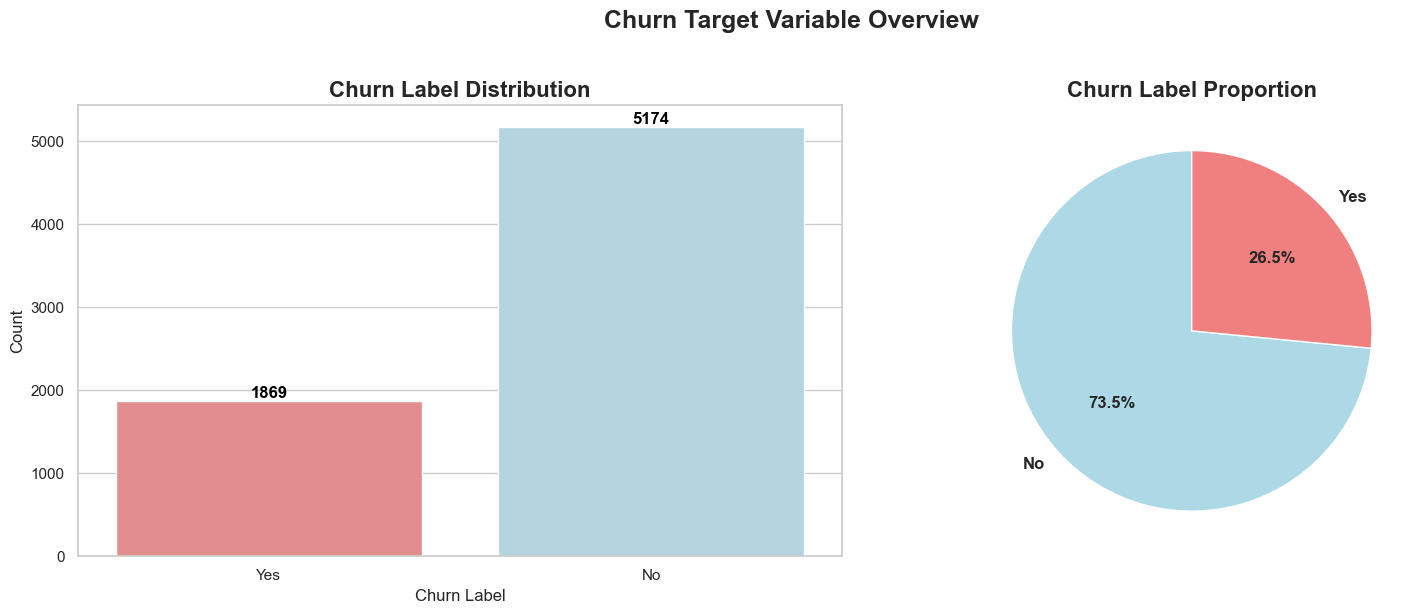

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Prepare figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Count plot
sns.countplot(data=df_clean, x='Churn Label', palette=['lightcoral', 'lightblue'], ax=ax1)
ax1.set_title('Churn Label Distribution', fontsize=16, fontweight='bold')
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('Churn Label', fontsize=12)

# Add count labels on bars
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{int(height)}', 
                 (p.get_x() + p.get_width() / 2., height), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Pie chart
churn_counts = df_clean['Churn Label'].value_counts()
colors = ['lightblue', 'lightcoral']
ax2.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize':12, 'fontweight':'bold'})
ax2.set_title('Churn Label Proportion', fontsize=16, fontweight='bold')

plt.suptitle('Churn Target Variable Overview', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3.2 Categorical Variables Analysis

In [278]:
# Define categorical columns
categorical_cols = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 
    'Contract', 'Paperless Billing', 'Payment Method'
]

print(f"Analyzing {len(categorical_cols)} categorical variables...")

Analyzing 16 categorical variables...


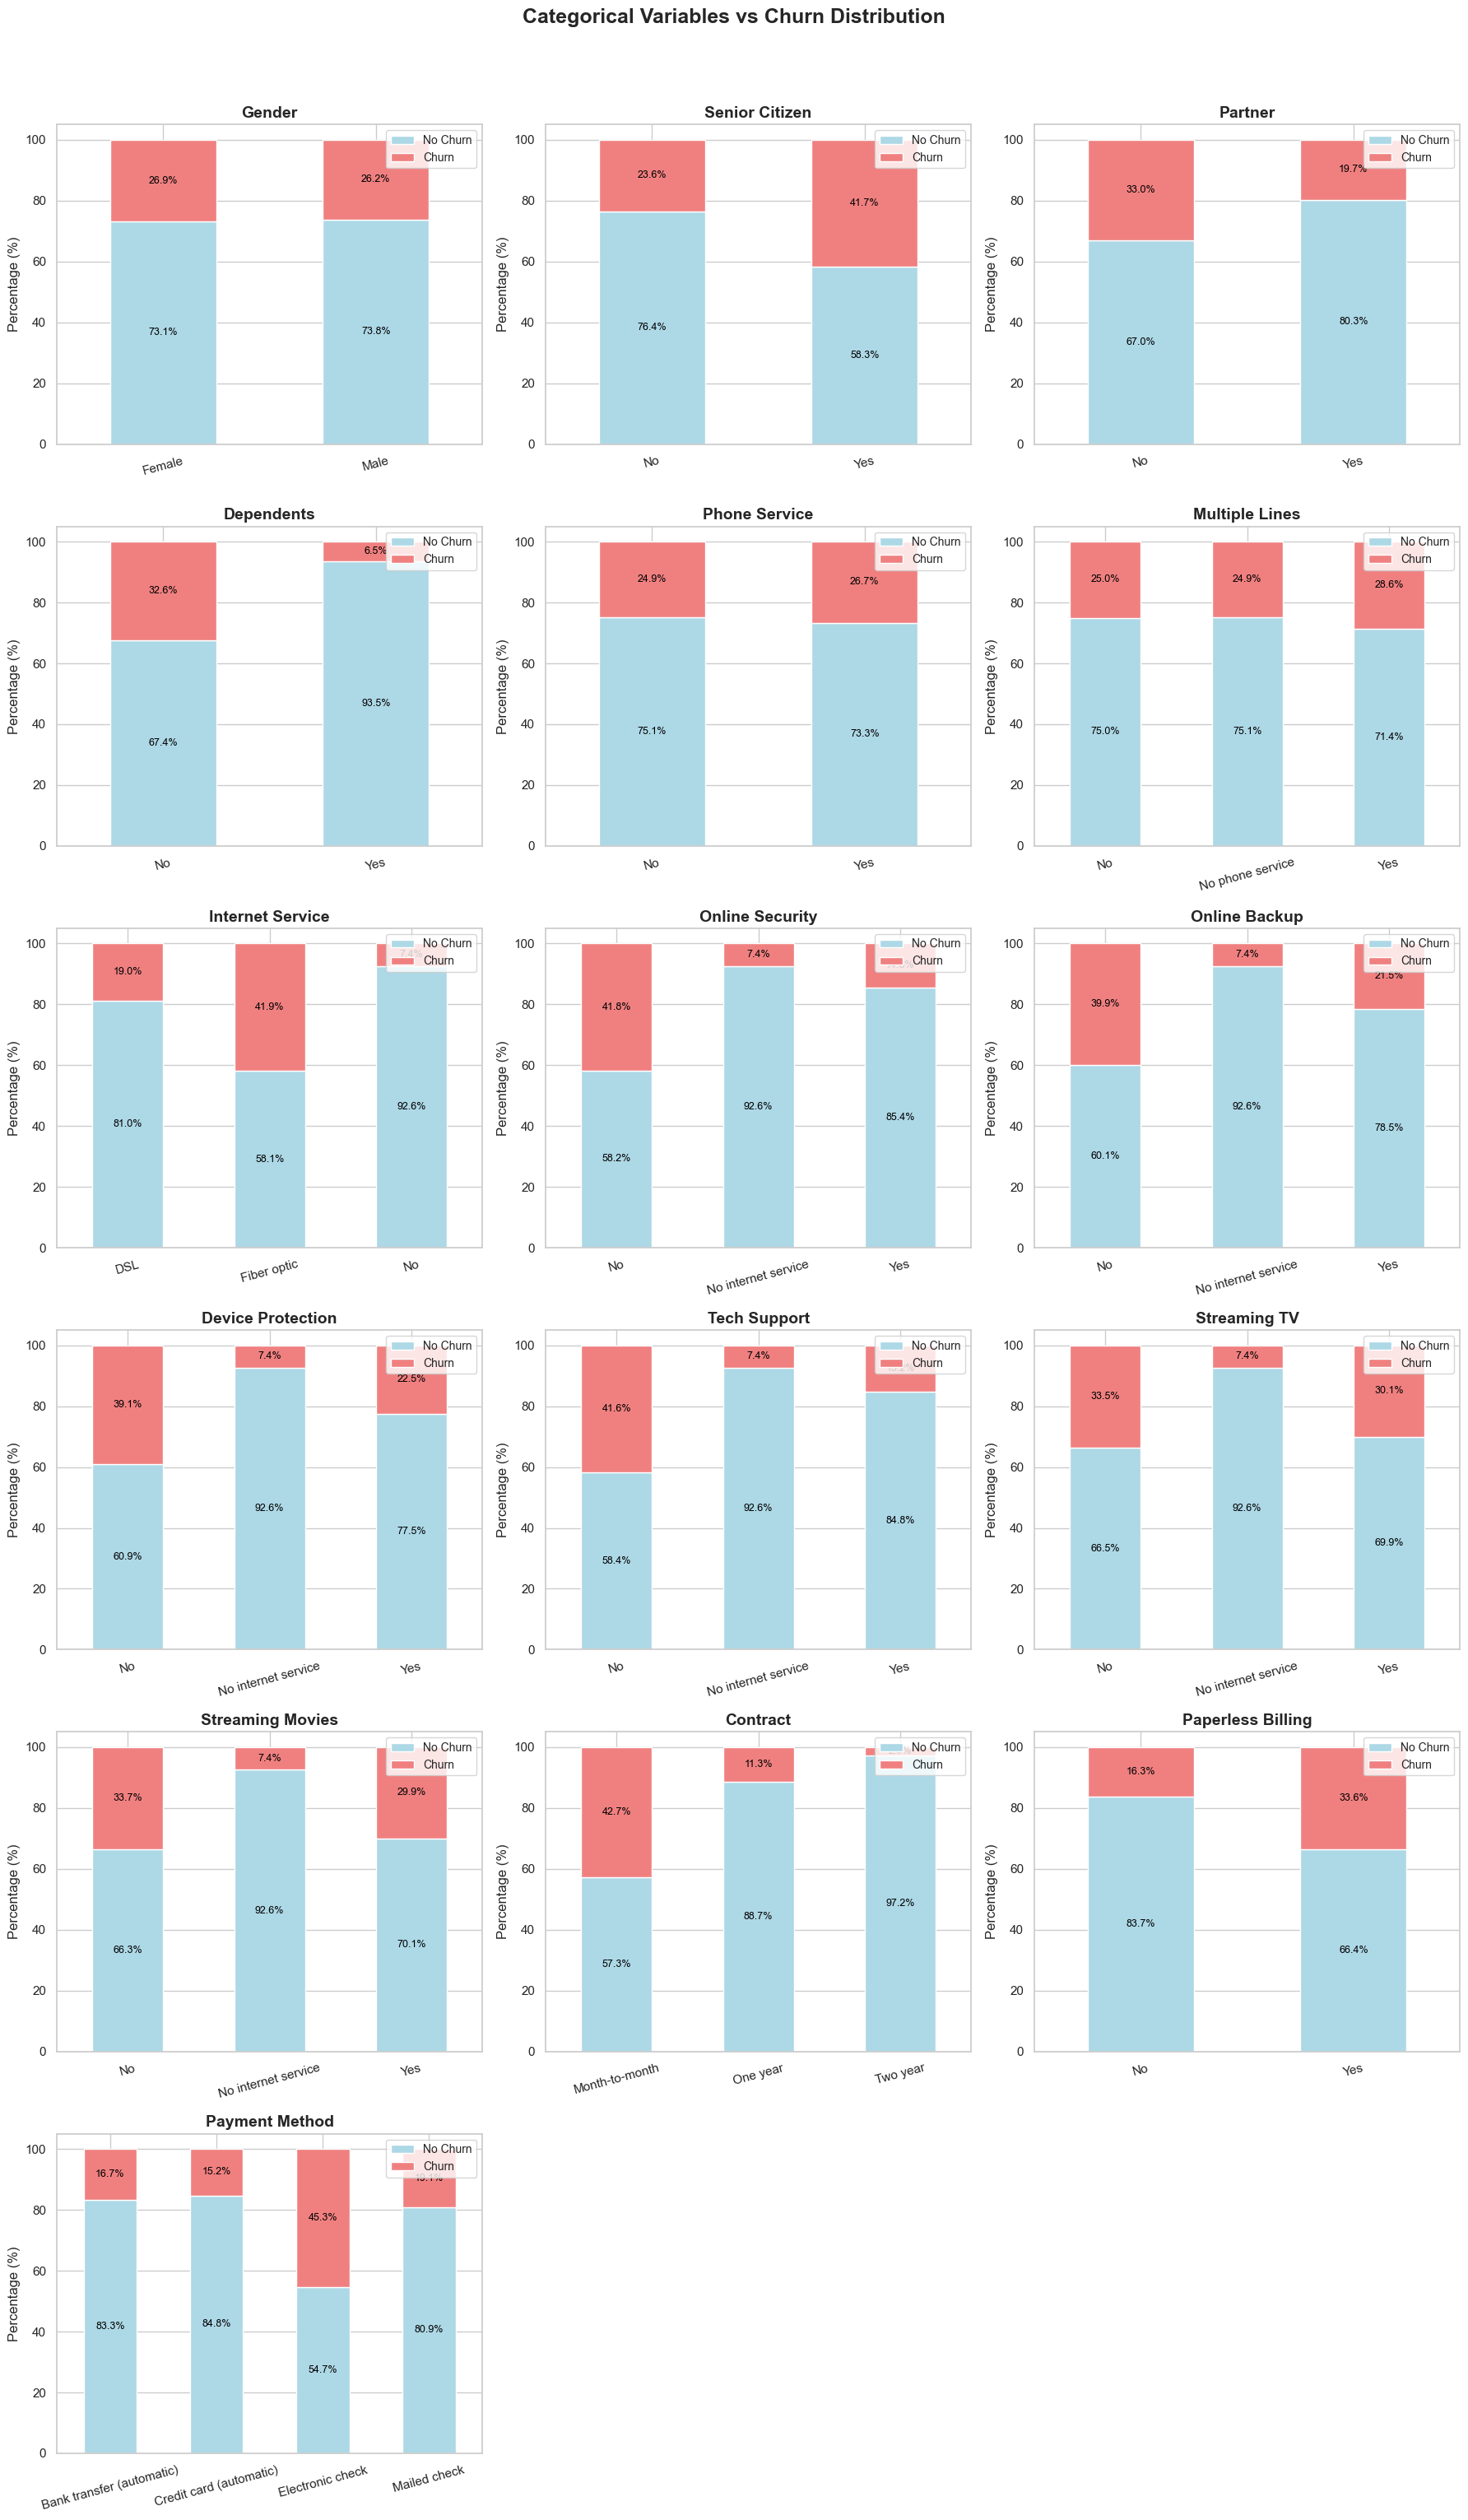

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Determine layout
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*5))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    # Compute percentages
    crosstab_pct = pd.crosstab(df_clean[col], df_clean['Churn Label'], normalize='index') * 100
    
    # Plot stacked bar chart
    crosstab_pct.plot(
        kind='bar', stacked=True, 
        ax=axes[i], 
        color=['lightblue', 'lightcoral'], 
        edgecolor='w'
    )
    
    axes[i].set_title(f'{col}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Percentage (%)', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=15)
    axes[i].legend(['No Churn', 'Churn'], loc='upper right', fontsize=10)
    
    # Add value labels
    for p in axes[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            axes[i].text(x + width/2, y + height/2, f'{height:.1f}%', ha='center', va='center', fontsize=9, color='black')

# Remove empty subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Categorical Variables vs Churn Distribution', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3.3 Numerical Variables Analysis

In [282]:
# Define numerical columns
numerical_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Score', 'CLTV']

print(f"Analyzing {len(numerical_cols)} numerical variables...")

# Summary statistics for numerical columns
df_clean[numerical_cols].describe()

Analyzing 5 numerical variables...


,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.265086,58.699418,4400.295755
std,24.559481,30.090047,2266.790864,21.525131,1183.057152
min,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,9.000000,35.500000,398.000000,40.000000,3469.000000
50%,29.000000,70.350000,1394.000000,61.000000,4527.000000
75%,55.000000,89.850000,3786.500000,75.000000,5380.500000
max,72.000000,118.750000,8684.000000,100.000000,6500.000000


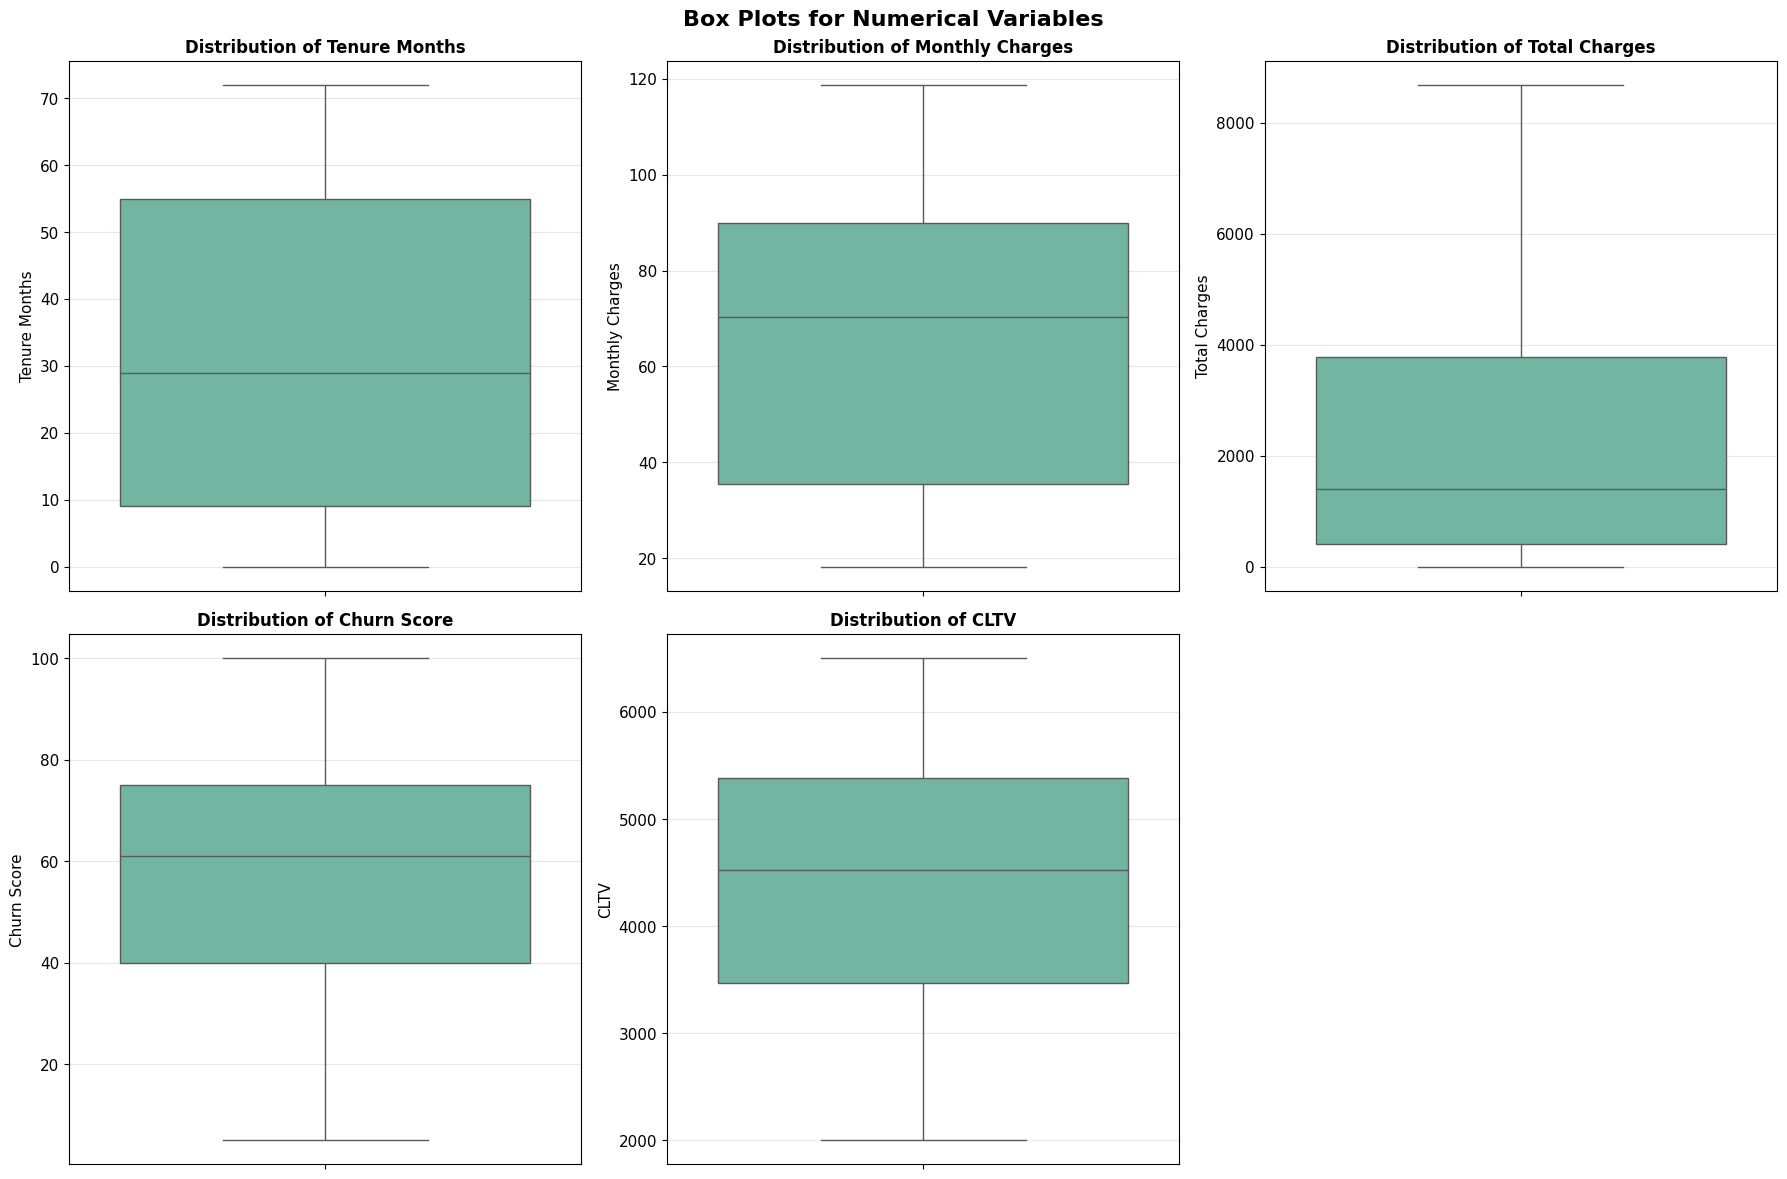

In [283]:
# Box plots for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_clean, y=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.suptitle('Box Plots for Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


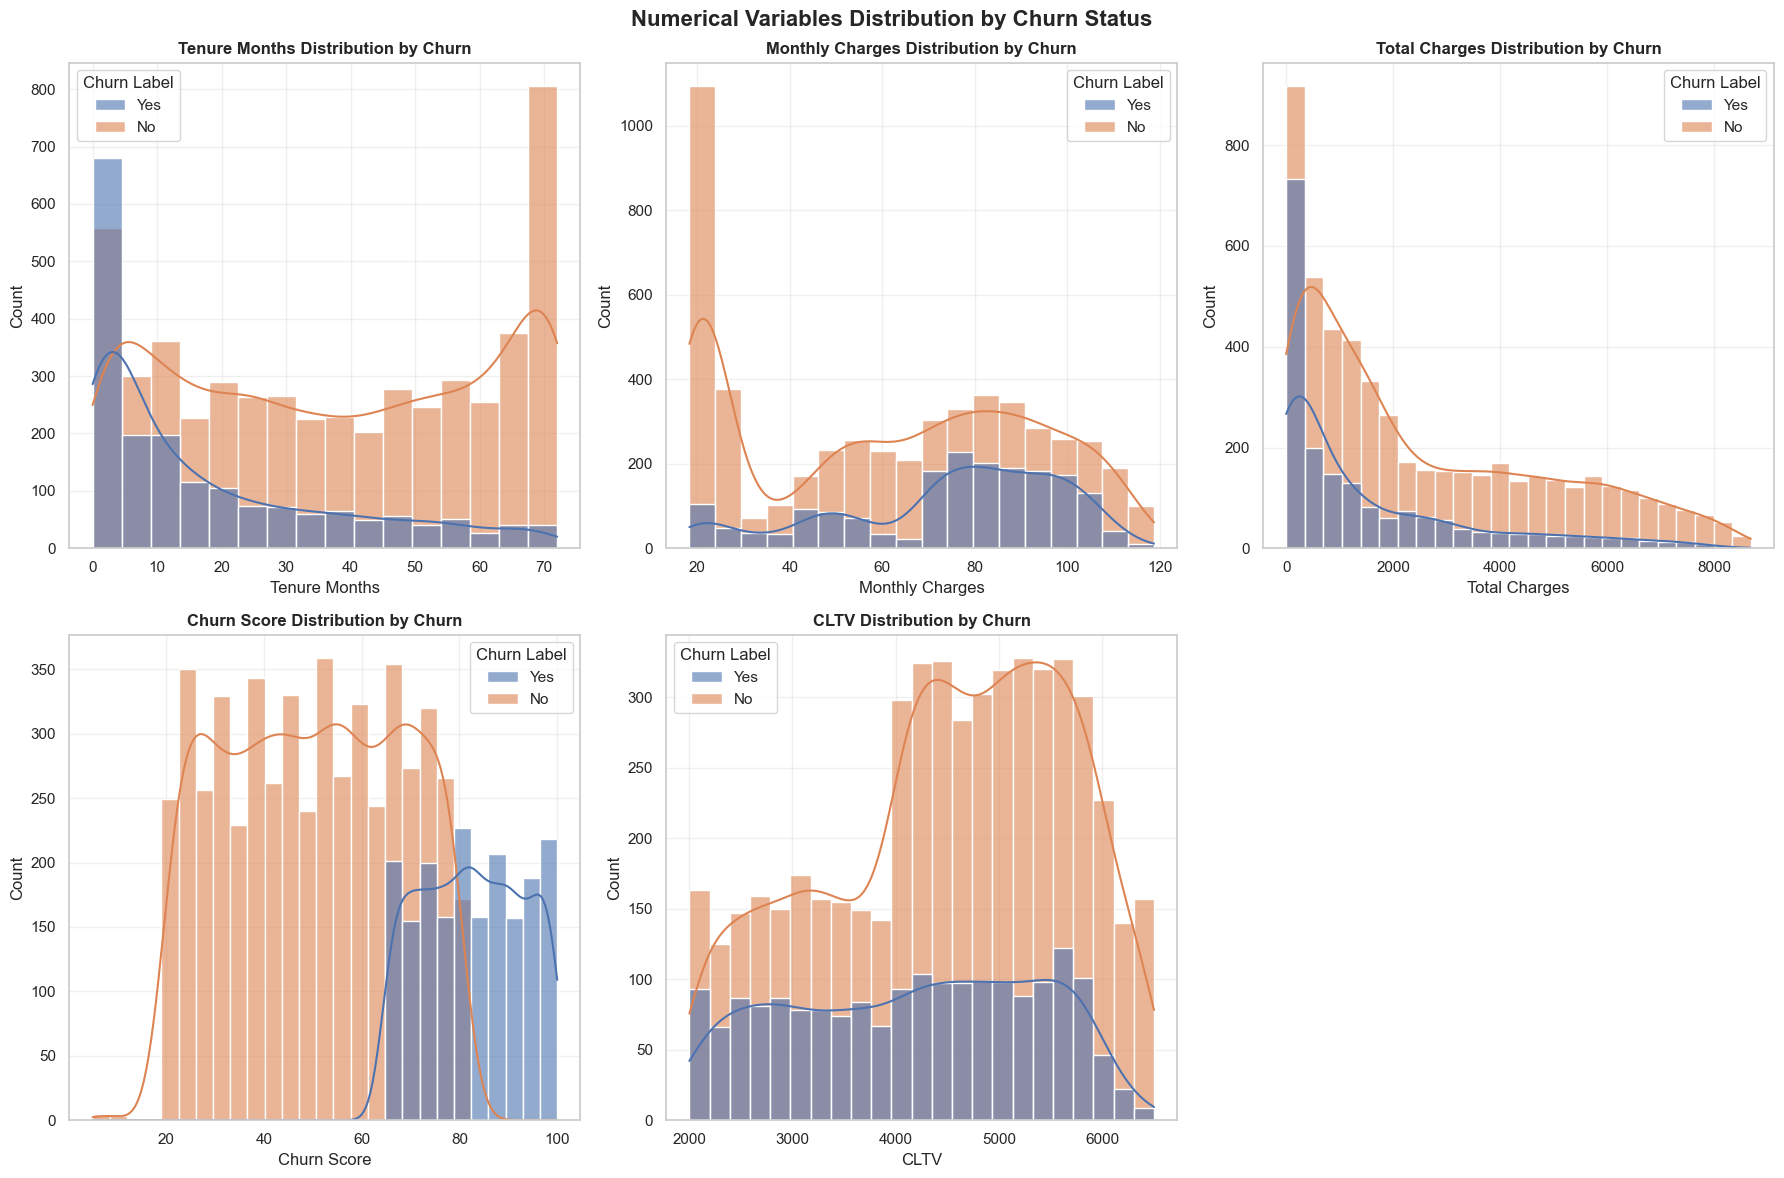

In [300]:
# Distribution plots with churn comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    # Plot KDE for both churn groups
    sns.histplot(data=df_clean, x=col, hue='Churn Label', 
                kde=True, ax=axes[i], alpha=0.6)
    axes[i].set_title(f'{col} Distribution by Churn', fontsize=12, fontweight='bold')
    axes[i].grid(alpha=0.3)

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.suptitle('Numerical Variables Distribution by Churn Status', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Bivariate Analysis

### 4.1 Churn Rate by Categorical Variables

In [285]:
# Calculate churn rates for categorical variables
print("Churn Rates by Categorical Variables:")
print("=" * 50)

churn_rates = {}
for col in categorical_cols:
    churn_rate = df_clean.groupby(col)['Churn Value'].mean() * 100
    churn_rates[col] = churn_rate
    print(f"\n{col}:")
    for category, rate in churn_rate.items():
        print(f"  {category}: {rate:.1f}%")

Churn Rates by Categorical Variables:

Gender:
  Female: 26.9%
  Male: 26.2%

Senior Citizen:
  No: 23.6%
  Yes: 41.7%

Partner:
  No: 33.0%
  Yes: 19.7%

Dependents:
  No: 32.6%
  Yes: 6.5%

Phone Service:
  No: 24.9%
  Yes: 26.7%

Multiple Lines:
  No: 25.0%
  No phone service: 24.9%
  Yes: 28.6%

Internet Service:
  DSL: 19.0%
  Fiber optic: 41.9%
  No: 7.4%

Online Security:
  No: 41.8%
  No internet service: 7.4%
  Yes: 14.6%

Online Backup:
  No: 39.9%
  No internet service: 7.4%
  Yes: 21.5%

Device Protection:
  No: 39.1%
  No internet service: 7.4%
  Yes: 22.5%

Tech Support:
  No: 41.6%
  No internet service: 7.4%
  Yes: 15.2%

Streaming TV:
  No: 33.5%
  No internet service: 7.4%
  Yes: 30.1%

Streaming Movies:
  No: 33.7%
  No internet service: 7.4%
  Yes: 29.9%

Contract:
  Month-to-month: 42.7%
  One year: 11.3%
  Two year: 2.8%

Paperless Billing:
  No: 16.3%
  Yes: 33.6%

Payment Method:
  Bank transfer (automatic): 16.7%
  Credit card (automatic): 15.2%
  Electronic ch

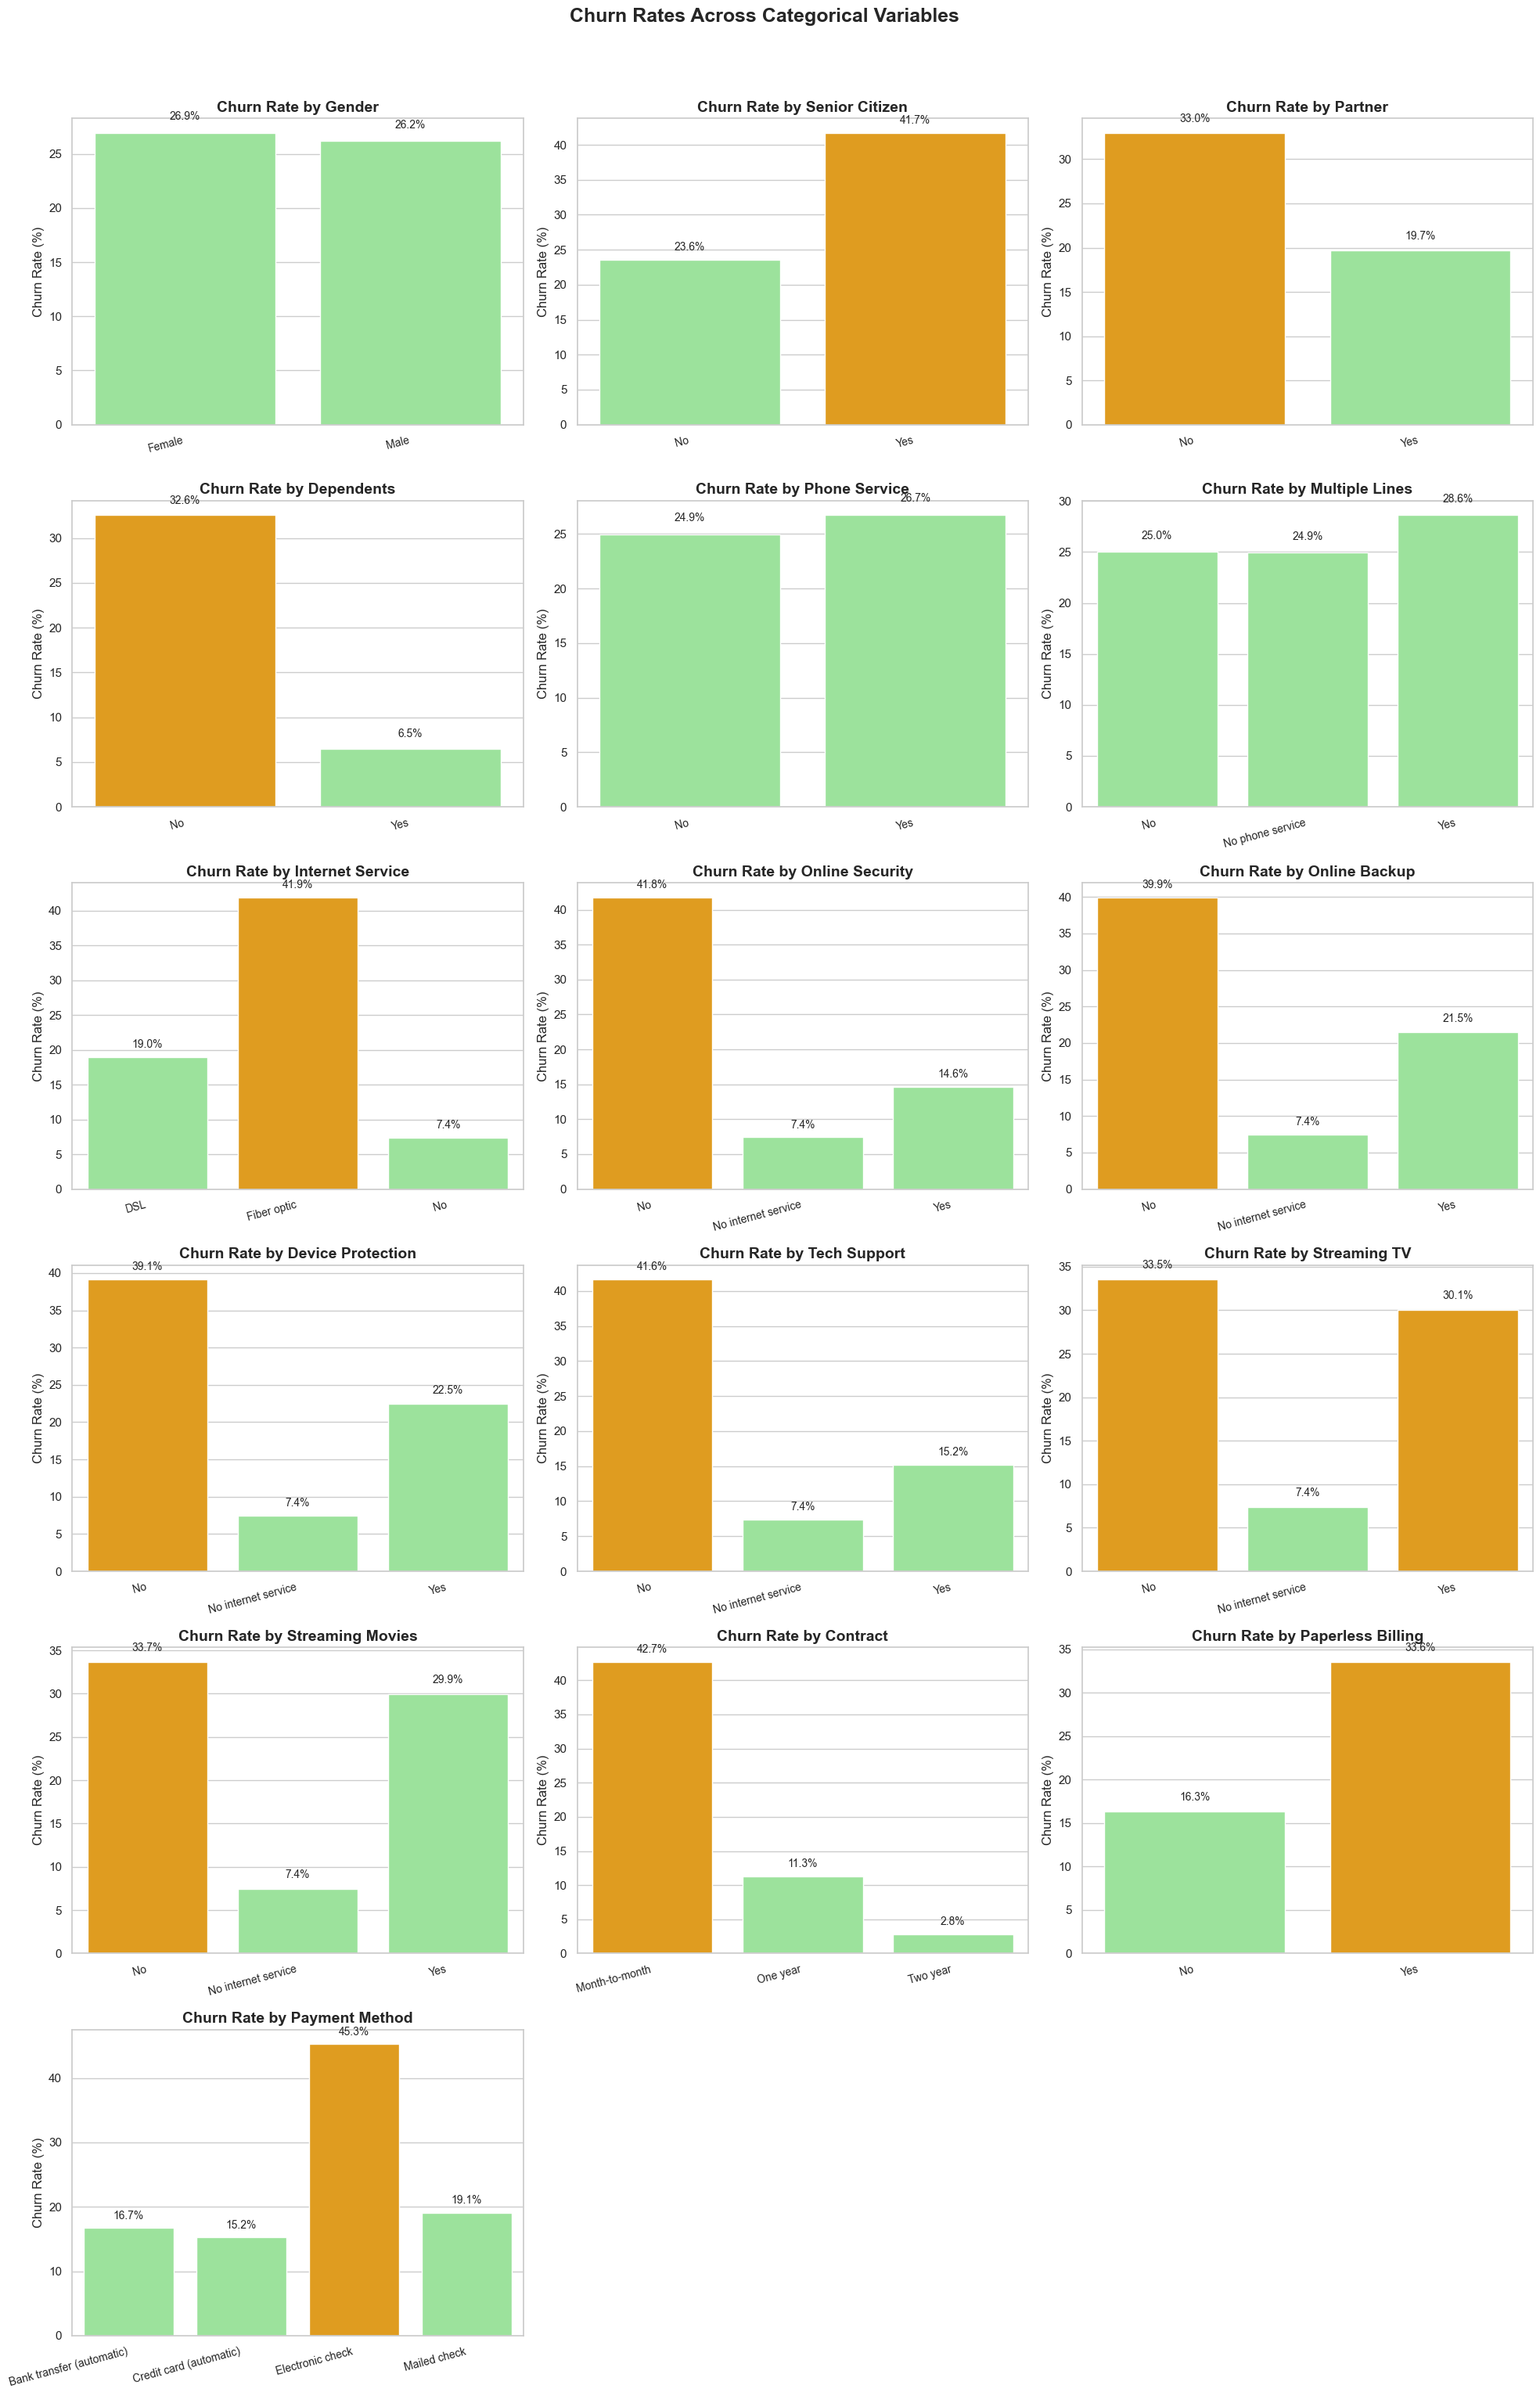

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Prepare figure
n_rows = (len(categorical_cols) + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(n_rows, 3, figsize=(20, n_rows*5))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    churn_rate = df_clean.groupby(col)['Churn Value'].mean() * 100
    
    # Color based on churn rate
    colors = ['lightgreen' if x < 30 else 'orange' if x < 50 else 'lightcoral' for x in churn_rate.values]
    
    sns.barplot(
        x=churn_rate.index, 
        y=churn_rate.values, 
        palette=colors,
        ax=axes[i]
    )
    
    axes[i].set_title(f'Churn Rate by {col}', fontsize=14, fontweight='bold')
    axes[i].set_ylabel('Churn Rate (%)', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_xticklabels(churn_rate.index, rotation=15, ha='right', fontsize=10)
    
    # Add value labels
    for j, value in enumerate(churn_rate.values):
        axes[i].text(j, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)
    
# Remove empty subplots
for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Churn Rates Across Categorical Variables', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 4.2 Numerical Variables vs Churn Score

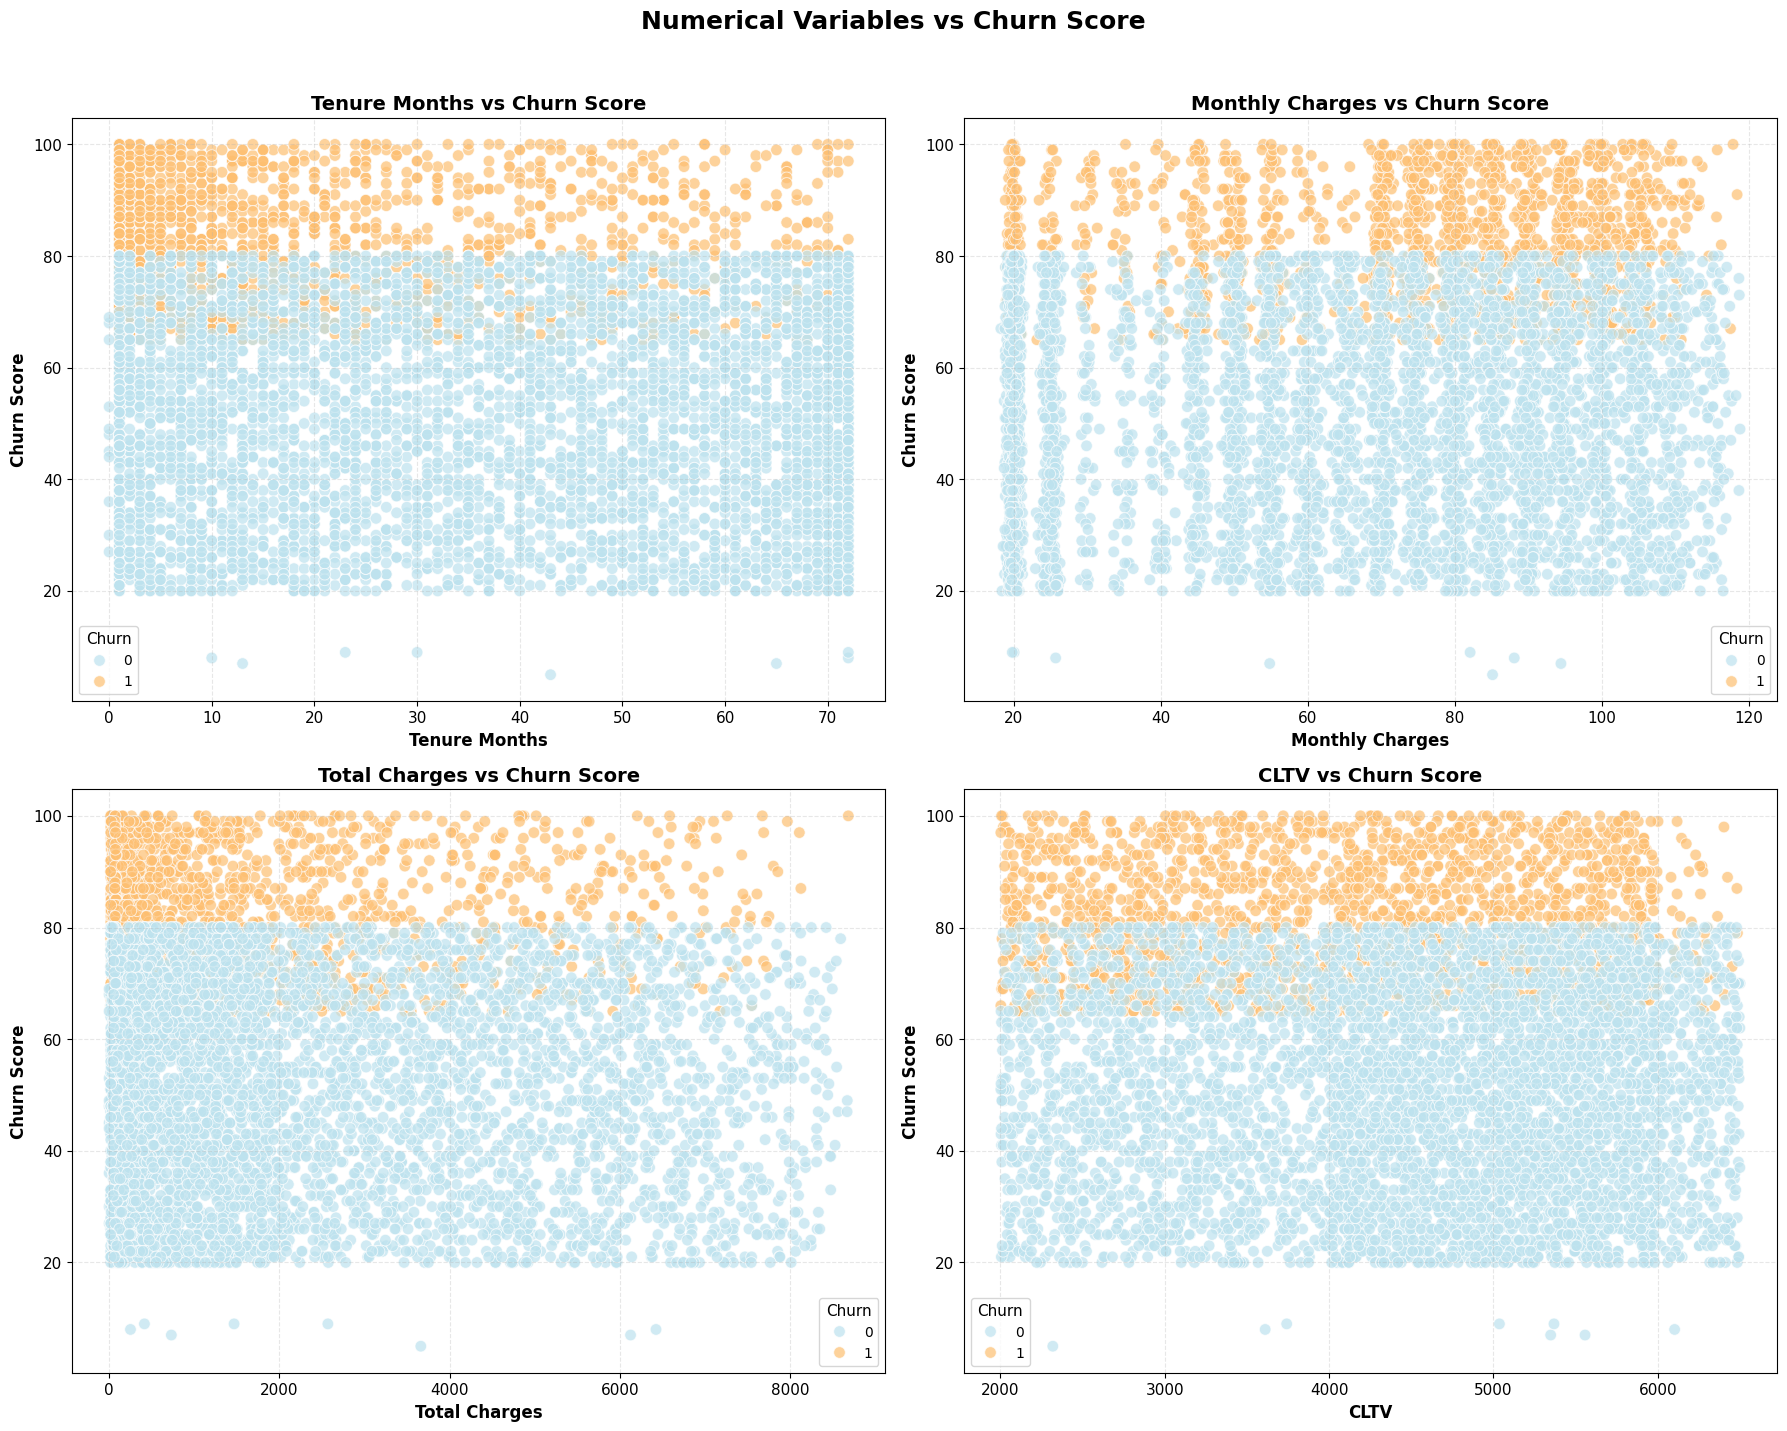

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots: Numerical variables vs Churn Score
numerical_cols_scatter = ['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']

fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = axes.ravel()

for i, col in enumerate(numerical_cols_scatter):
    sns.scatterplot(
        x=df_clean[col], 
        y=df_clean['Churn Score'], 
        hue=df_clean['Churn Value'],
        palette='RdYlBu_r',
        alpha=0.7,
        ax=axes[i],
        edgecolor='w',
        s=70  # point size
    )
    axes[i].set_xlabel(col, fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Churn Score', fontsize=12, fontweight='bold')
    axes[i].set_title(f'{col} vs Churn Score', fontsize=14, fontweight='bold')
    axes[i].grid(True, linestyle='--', alpha=0.3)
    axes[i].legend(title='Churn', loc='best', fontsize=10)

plt.suptitle('Numerical Variables vs Churn Score', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

In [289]:
# Prepare data for correlation analysis
df_corr = df_clean.copy()

# Convert categorical variables to numerical (for correlation analysis)
categorical_to_encode = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 
                        'Phone Service', 'Multiple Lines', 'Internet Service', 
                        'Paperless Billing', 'Churn Label']

for col in categorical_to_encode:
    if col in df_corr.columns:
        df_corr[col] = pd.Categorical(df_corr[col]).codes

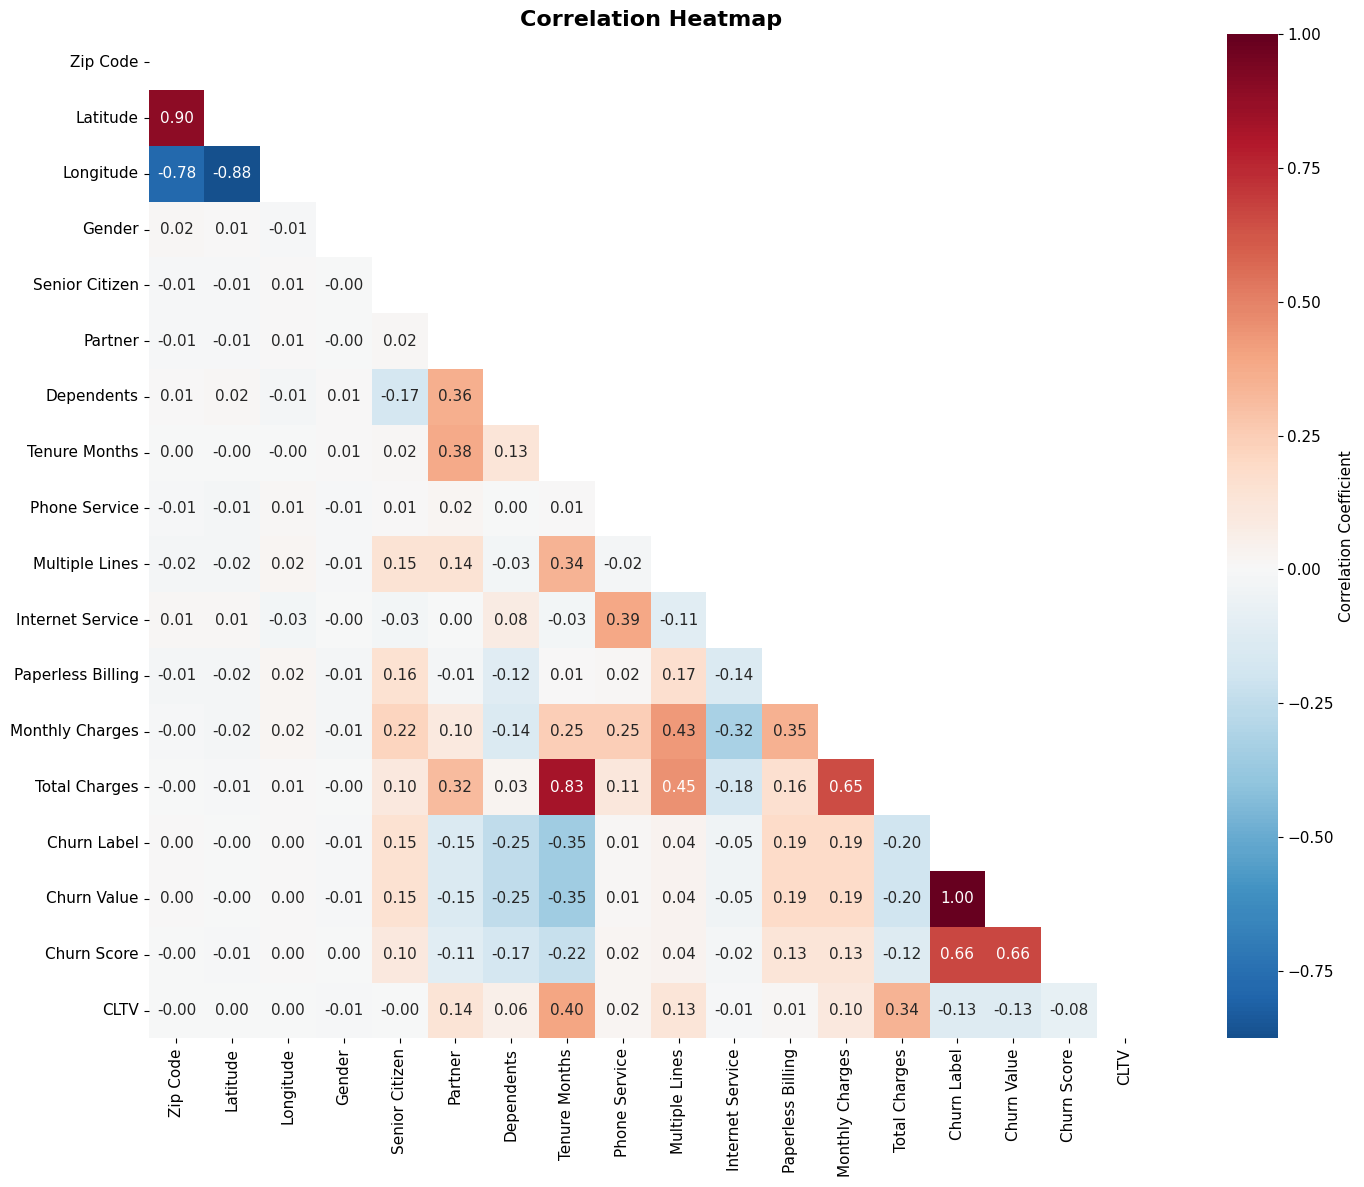

In [290]:
# Calculate correlation matrix
correlation_matrix = df_corr.select_dtypes(include=[np.number]).corr()

# Plot correlation heatmap
plt.figure(figsize=(16, 12))
mask = np.triu(correlation_matrix.corr())
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [291]:
# Find variables most correlated with churn
churn_correlations = correlation_matrix['Churn Value'].abs().sort_values(ascending=False)
print("Variables most correlated with Churn:")
print("=" * 40)
for var, corr in churn_correlations.head(10).items():
    if var != 'Churn Value':
        print(f"{var}: {corr:.3f}")

Variables most correlated with Churn:
Churn Label: 1.000
Churn Score: 0.665
Tenure Months: 0.352
Dependents: 0.249
Total Charges: 0.198
Monthly Charges: 0.193
Paperless Billing: 0.192
Senior Citizen: 0.151
Partner: 0.150


## 6. Key Insights

In [293]:
print("KEY INSIGHTS FROM EDA:")
print("=" * 50)
print()

print("DATASET OVERVIEW:")
print(f"   • Total customers: {df_clean.shape[0]:,}")
print(f"   • Features: {df_clean.shape[1]}")
print(f"   • Churn rate: {df_clean['Churn Value'].mean()*100:.1f}%")
print()

print("CHURN PATTERNS:")
print("   • Customers with tenure < 20 months have higher churn rates")
print("   • Month-to-month contracts show significantly higher churn")
print("   • Electronic check payment method correlates with higher churn")
print("   • Fiber optic internet service users churn more frequently")
print("   • Senior citizens have higher churn rates")
print()

print("FINANCIAL INSIGHTS:")
print("   • Higher monthly charges are associated with increased churn")
print("   • Customers with lower total charges tend to churn more")
print("   • CLTV shows moderate correlation with churn behavior")
print()

print("PREDICTIVE INDICATORS:")
print("   • Churn Score above 60 strongly indicates potential churn")
print("   • Contract type is a strong predictor of churn")
print("   • Combination of high monthly charges + short tenure = high risk")


KEY INSIGHTS FROM EDA:

DATASET OVERVIEW:
   • Total customers: 7,043
   • Features: 29
   • Churn rate: 26.5%

CHURN PATTERNS:
   • Customers with tenure < 20 months have higher churn rates
   • Month-to-month contracts show significantly higher churn
   • Electronic check payment method correlates with higher churn
   • Fiber optic internet service users churn more frequently
   • Senior citizens have higher churn rates

FINANCIAL INSIGHTS:
   • Higher monthly charges are associated with increased churn
   • Customers with lower total charges tend to churn more
   • CLTV shows moderate correlation with churn behavior

PREDICTIVE INDICATORS:
   • Churn Score above 60 strongly indicates potential churn
   • Contract type is a strong predictor of churn
   • Combination of high monthly charges + short tenure = high risk


## 7. Data Export

In [305]:
# Save cleaned dataset
output_path = r"artifacts/eda/cleaned_df.csv"
df_clean.to_csv(output_path, index=False)

print(f"✓ Cleaned dataset saved to: {output_path}")
print(f"✓ Final dataset shape: {df_clean.shape}")
print("✓ EDA completed successfully!")


✓ Cleaned dataset saved to: artifacts/eda/cleaned_df.csv
✓ Final dataset shape: (7043, 29)
✓ EDA completed successfully!
